## Name: Aswathi Ajith
### Task -1

###  Data preparation and customer analytics

##### Creating and interpreting high-level summaries of the data 

##### Finding outliers and removing these (if applicable) 

##### Checking data formats and correcting (if applicable) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Import Dataset

In [2]:
trans_df = pd.read_csv("Downloads/QVI_transaction_data.csv")

In [3]:
trans_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [4]:
customer_df = pd.read_csv("Downloads/QVI_purchase_behaviour.csv")

# Data Exploration

In [5]:
# Basic information of the dataset
customer_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [6]:
# Basic information of the dataset
trans_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
# Statistical Summary of the dataset
trans_df.describe().T

,count,mean,std,min,25%,50%,75%,max
DATE,264836.0,43464.036260,105.389282,43282.0,43373.0,43464.0,43555.00,43646.0
STORE_NBR,264836.0,135.080110,76.784180,1.0,70.0,130.0,203.00,272.0
LYLTY_CARD_NBR,264836.0,135549.476404,80579.978022,1000.0,70021.0,130357.5,203094.25,2373711.0
TXN_ID,264836.0,135158.310815,78133.026026,1.0,67601.5,135137.5,202701.25,2415841.0
PROD_NBR,264836.0,56.583157,32.826638,1.0,28.0,56.0,85.00,114.0
PROD_QTY,264836.0,1.907309,0.643654,1.0,2.0,2.0,2.00,200.0
TOT_SALES,264836.0,7.304200,3.083226,1.5,5.4,7.4,9.20,650.0


In [8]:
# Statistical Summary of the dataset
customer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
LYLTY_CARD_NBR,72637.0,136185.93177,89892.932014,1000.0,66202.0,134040.0,203375.0,2373711.0


## To check whether there is null values

In [9]:
trans_df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [10]:
customer_df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

#### -----> No null values in either of the datasets

## To check the data types of the entry

In [11]:
trans_dtype = trans_df.dtypes
trans_dtype

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

#### To correct the dtype of date column from integer to date type

In [12]:
trans_df['DATE'] = pd.to_datetime(trans_df['DATE'], unit='D', origin='1899-12-30')
print(trans_df['DATE'].dtype) 

datetime64[ns]


In [13]:
trans_df['DATE']

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264836, dtype: datetime64[ns]

In [14]:
trans_dtype = trans_df.dtypes
trans_dtype

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

In [15]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 15.2+ MB


In [16]:
customer_dtype = customer_df.dtypes
customer_dtype

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

## To find outliers

### Merge the data 

In [17]:
# Merging both dataset
merged_df = pd.merge(trans_df, customer_df, on = 'LYLTY_CARD_NBR', how ='right')
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2018-09-16,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,YOUNG SINGLES/COUPLES,Mainstream
2,2019-03-07,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,YOUNG FAMILIES,Budget
3,2019-03-08,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,YOUNG FAMILIES,Budget
4,2018-11-02,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9,OLDER SINGLES/COUPLES,Mainstream


In [18]:
# Informations about the merged data
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264836 non-null  datetime64[ns]
 1   STORE_NBR         264836 non-null  int64         
 2   LYLTY_CARD_NBR    264836 non-null  int64         
 3   TXN_ID            264836 non-null  int64         
 4   PROD_NBR          264836 non-null  int64         
 5   PROD_NAME         264836 non-null  object        
 6   PROD_QTY          264836 non-null  int64         
 7   TOT_SALES         264836 non-null  float64       
 8   LIFESTAGE         264836 non-null  object        
 9   PREMIUM_CUSTOMER  264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 19.2+ MB


## Check the product names

In [19]:
merged_df['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'Red Rock Deli Chikn&Garlic Aioli 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Natural ChipCo      Hony Soy Chckn175g',
       'WW Original Stacked Chips 160g', 'Cheetos Puffs 165g',
       'Infuzions SourCream&Herbs Veg Strws 110g',
       'RRD SR Slow Rst     Pork Belly 150g',
       'Doritos Cheese      Supreme 330g', 'Doritos Mexicana    170g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'GrnWves Plus Btroot & Chilli Jam 180g',
       'Smiths Crinkle Cut  Chips Barbecue 170g',
       'Kettle Sensations   Camembert & Fig 150g',
       'Doritos Corn Chip Southern Chicken 150g',
       'CCs Tasty Cheese    175g', 'Tostitos Splash Of  Lime 175g',
       'Kettle 135g Swt Pot Sea Salt', 'RRD Salt & Vinegar  165g',
       'Infuzions Mango     Chutny Papadums 70g',
       'Smiths Crinkle Cut  Snag&Sauce 150g',
       'Smiths Crinkle      Original 330g',
       'RRD Sweet Chilli &  Sour Cream 165g',
     

In [20]:
# To extract just the product names
product_names = merged_df["PROD_NAME"].str.replace(r'([0-9]+[gG])','')
product_names= product_names.str.replace(r'&',' ').str.split()

C:\Users\ASUS\AppData\Local\Temp/ipykernel_11092/2341025304.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  product_names = merged_df["PROD_NAME"].str.replace(r'([0-9]+[gG])','')


In [21]:
# Flatten the list of lists in `product_names` to a single list of words
all_words = [word for words in product_names for word in words]

# Convert to a pandas Series and count occurrences of each word
word_counts = pd.Series(all_words).value_counts()

print(word_counts)

Chips        49770
Kettle       41288
Smiths       28860
Salt         27976
Cheese       27890
             ...  
Frch/Onin     1432
Pc            1431
NCC           1419
Garden        1419
Fries         1418
Length: 196, dtype: int64


In [22]:
# merged_df =  merged_df[merged_df['PROD_NAME'].str.contains(r'[Ss]alsa')==False]

In [23]:
# merged_df['PROD_NAME'].str.contains(r'[Ss]alsa')==False

#### To find outliers

In [24]:
merged_df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [25]:
merged_df.isnull().values.any()

False

#### Product quantity has an outlier of value 200

In [26]:
# To sort the values of the porduct quantity, so as to identify the outliers
merged_df.sort_values(by ='PROD_QTY', ascending = False).head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
221626,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
221625,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
145041,2019-05-20,148,148238,148046,87,Infuzions BBQ Rib Prawn Crackers 110g,5,19.0,OLDER SINGLES/COUPLES,Mainstream
89729,2018-08-16,93,93152,91631,46,Kettle Original 175g,5,27.0,RETIREES,Premium
76734,2018-08-15,80,80018,78356,26,Pringles Sweet&Spcy BBQ 134g,5,18.5,MIDAGE SINGLES/COUPLES,Mainstream


In [27]:
merged_df.loc[merged_df['PROD_QTY'] == 200.0]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
221625,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
221626,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium


#### Product quantity of 200, has been purchased by a single customer (LYLTY_CARD_NBR = 226000)  and this can be identified as the outlier

In [28]:
merged_df.loc[merged_df['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
221625,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
221626,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium


#### To get rid of the outlier,

In [29]:
merged_df = merged_df[merged_df['LYLTY_CARD_NBR'] != 226000]
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2018-09-16,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,YOUNG SINGLES/COUPLES,Mainstream
2,2019-03-07,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,YOUNG FAMILIES,Budget
3,2019-03-08,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,YOUNG FAMILIES,Budget
4,2018-11-02,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9,OLDER SINGLES/COUPLES,Mainstream


In [30]:
merged_df.loc[merged_df['PROD_QTY'] == 200.0]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER


In [31]:
merged_df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
std,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


#### The dataset is now free from any outliers 

## To find any missing entries

In [32]:
merged_df["DATE"].describe()

C:\Users\ASUS\AppData\Local\Temp/ipykernel_11092/117790673.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  merged_df["DATE"].describe()


count                  264834
unique                    364
top       2018-12-24 00:00:00
freq                      939
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object

#### Only 364 values are there and there is one value missing

#### To find the missing date,

In [33]:
print(merged_df["DATE"].max())
print(merged_df["DATE"].min())

2019-06-30 00:00:00
2018-07-01 00:00:00


In [34]:
pd.date_range(start = merged_df["DATE"].min(), end = merged_df["DATE"].max() ).difference(merged_df["DATE"])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

#### 25th of december is the missing date, as there was no sale on that day beacuse of holiday for christmas

#### Now, to plot the days versus the transactions for each days,

#### We need a series of all possible dates,

In [35]:
all_dates = pd.merge(pd.Series(pd.date_range(start=merged_df['DATE'].min(), end= merged_df['DATE'].max()), name="DATE"), 
                     merged_df, on='DATE', how='left')

#### Now, to get the no of transactions by date,

In [36]:
trans_counts_by_date = merged_df["DATE"].value_counts()

In [37]:
trans_counts_by_date.sort_values(ascending=False)

2018-12-24    939
2018-12-23    917
2018-12-22    915
2018-12-19    906
2018-12-18    862
             ... 
2018-12-12    664
2019-06-24    662
2019-06-13    659
2018-10-18    658
2018-11-25    648
Name: DATE, Length: 364, dtype: int64

In [38]:
len(trans_counts_by_date.index)

364

In [39]:
# To get the transactions of all days of december
december = trans_counts_by_date[(trans_counts_by_date.index >= pd.datetime(2018, 12, 1)) & 
                                (trans_counts_by_date.index < pd.datetime(2019, 1, 1))].sort_index()


C:\Users\ASUS\AppData\Local\Temp/ipykernel_11092/1596706666.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  december = trans_counts_by_date[(trans_counts_by_date.index >= pd.datetime(2018, 12, 1)) &
C:\Users\ASUS\AppData\Local\Temp/ipykernel_11092/1596706666.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (trans_counts_by_date.index < pd.datetime(2019, 1, 1))].sort_index()


In [40]:
from datetime import datetime
# To convert date time format to just the day of the month
december.index = december.index.strftime('%d')

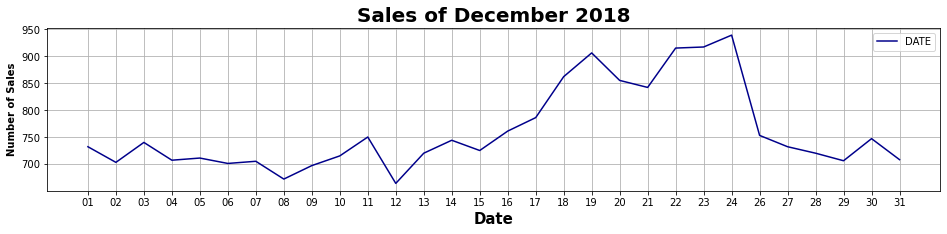

In [41]:
# To plot the transactions of each days in december, versus the day of the month
ax = december.plot(figsize=(16,3), color="darkblue")
ax.set_xticks(np.arange(len(december)))
ax.set_xticklabels(december.index)
plt.title("Sales of December 2018", fontsize=20, fontweight='bold', color='black')
plt.xlabel("Date", fontsize=15, fontweight='bold', color='black')
plt.ylabel("Number of Sales", fontsize=10, fontweight='bold', color='black')
plt.grid()
plt.legend()
plt.show()

#### On analyzing we can see that there is a spike in the sales in december until just before the chrsitmas day and there is missing sales (or no sales) on the christmas day. The day 25th of December is missing

## Analyzing packet sizes

In [42]:
# To extract just the quantity numerical values,
# Replace all G or g along with the numerical value by just a single type of 'g'
merged_df['PROD_NAME'] = merged_df['PROD_NAME'].str.replace(r'[0-9]+G','g')

C:\Users\ASUS\AppData\Local\Temp/ipykernel_11092/2806371510.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  merged_df['PROD_NAME'] = merged_df['PROD_NAME'].str.replace(r'[0-9]+G','g')


In [43]:
# Check
merged_df['PROD_NAME']

0           Natural Chip        Compny SeaSalt175g
1            Red Rock Deli Chikn&Garlic Aioli 150g
2               Grain Waves Sour    Cream&Chives g
3           Natural ChipCo      Hony Soy Chckn175g
4                   WW Original Stacked Chips 160g
                            ...                   
264831       Grain Waves         Sweet Chilli 210g
264832        Kettle Tortilla ChpsFeta&Garlic 150g
264833     Tyrrells Crisps     Lightly Salted 165g
264834    Old El Paso Salsa   Dip Chnky Tom Ht300g
264835    Smiths Crinkle Chips Salt & Vinegar 330g
Name: PROD_NAME, Length: 264834, dtype: object

In [44]:
# To extract the quantity part from the whole string
packet_size = merged_df['PROD_NAME'].str.extract(r'([0-9]+[gG])')[0]

In [45]:
packet_size

0         175g
1         150g
2          NaN
3         175g
4         160g
          ... 
264831    210g
264832    150g
264833    165g
264834    300g
264835    330g
Name: 0, Length: 264834, dtype: object

In [46]:
# Finally, getting jut the quantity with no suffix, and converting the value to float values,
packet_size = packet_size.str.replace("g","").astype(float)

In [47]:
# Sort the values in accordance with the quantity ascending order
packet_size.value_counts().sort_index(ascending=True)

70.0      1507
90.0      3008
110.0    22387
125.0     1454
134.0    25102
135.0     3257
150.0    41633
160.0     2970
165.0    15297
170.0    19983
175.0    64929
180.0     1468
190.0     2995
200.0     4473
210.0     3167
220.0     1564
250.0     3169
270.0     6285
300.0    15166
330.0    12540
380.0     6416
Name: 0, dtype: int64

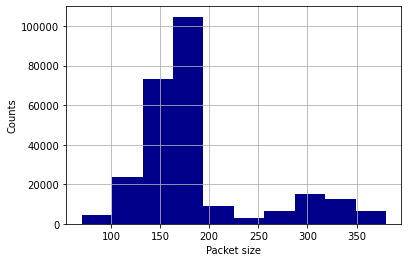

In [48]:
# To plot the packet size verses its count
packet_size.plot.hist(color='darkblue')
plt.xlabel("Packet size")
plt.ylabel("Counts")
plt.grid()
plt.show()


## Now, to work with the brand names,

In [49]:
# To extract the brand names from the product names,
merged_df['brand_names'] = merged_df['PROD_NAME'].str.split().str[0]

In [50]:
# To find the count of the brands, and sort 
merged_df['brand_names'].value_counts().sort_index()

Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3183
Doritos       24962
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Old            9324
Pringles      25102
RRD           11894
Red            5885
Smith          2963
Smiths        28860
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     4437
Name: brand_names, dtype: int64

In [51]:
# All brand names,
merged_df['brand_names'].unique()

array(['Natural', 'Red', 'Grain', 'WW', 'Cheetos', 'Infuzions', 'RRD',
       'Doritos', 'Old', 'GrnWves', 'Smiths', 'Kettle', 'CCs', 'Tostitos',
       'Cobs', 'Burger', 'Woolworths', 'Thins', 'Tyrrells', 'Smith',
       'Cheezels', 'Twisties', 'Sunbites', 'Snbts', 'Pringles', 'French',
       'Infzns', 'Dorito', 'NCC'], dtype=object)

In [52]:
# No. of brand names,
len(merged_df['brand_names'].unique())

29

#### We have to correct the brand names that are named incorrectly and repeatedly, 

In [53]:
def clean_brand_names(x):
    brand = x['brand_names']
    if brand == "Dorito":
        return "Doritos"
    elif brand == "GrnWves" or brand == "Grain":
        return "Grain Waves"
    elif brand == "Infzns":
        return "Infuzions"
    elif brand == "Natural" or brand == "NCC":
        return "Natural Chip Co"
    elif brand == "Red":
        return "RRD"
    elif brand == "Smith":
        return "Smiths"
    elif brand == "Snbts":
        return "Sunbites"
    elif brand == "WW":
        return "Woolworths"
    else:
        return brand

In [54]:
merged_df['brand_names'] = merged_df.apply(lambda x: clean_brand_names(x), axis=1)

In [55]:
len(merged_df['brand_names'].unique())

21

#### The no. of brand names has been reduced

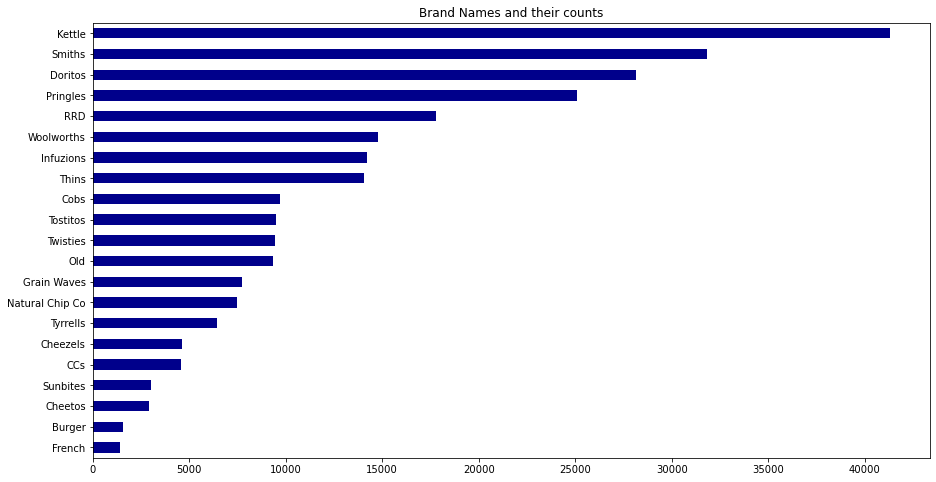

In [56]:
# To plot the brand names with their count, 
merged_df['brand_names'].value_counts().sort_values(ascending=True).plot.barh(figsize=(15,8), color='darkblue')
plt.title("Brand Names and their counts")
plt.show()

#### Most preffered brand is Kettle

## Customer datas

#### We have to check with the columns LIFESTAGE and PREMIUM_CUTOMER

In [57]:
merged_df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'LIFESTAGE', 'PREMIUM_CUSTOMER',
       'brand_names'],
      dtype='object')

In [58]:
merged_df['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [59]:
merged_df['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [60]:
# Group by the type of customers and their corresponding total sales's sum and mean is found, 
customer_sales = pd.DataFrame(merged_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].agg(['sum','mean']))

In [61]:
customer_sales

sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
MIDAGE SINGLES/COUPLES Budget             35514.80  7.074661
                       Mainstream         90803.85  7.647284
                       Premium            58432.65  7.112056
NEW FAMILIES           Budget             21928.45  7.297321
                       Mainstream         17013.90  7.317806
                       Premium            11491.10  7.231655
OLDER FAMILIES         Budget            168363.25  7.269570
                       Mainstream        103445.55  7.262395
                       Premium            80658.40  7.208079
OLDER SINGLES/COUPLES  Budget            136769.80  7.430315
                       Mainstream        133393.80  7.282116
                       Premium           132263.15  7.449766
RETIREES               Budget            113147.80  7.443445
                       Mainstream        155677.05  7.252262
                       Premium            97646.05  7.456174
YOUNG FAMILIES         Budget            139345.85  7.287201
                       Mainstream         92788.75  7.189025
                       Premium            84025.50  7.266756
YOUNG SINGLES/COUPLES  Budget             61141.60  6.615624
                       Mainstream        157621.60  7.558339
                       Premium            41642.10  6.629852

In [62]:
# The total of all the sales 
customer_sales['sum'].sum()

1933115.0000000002

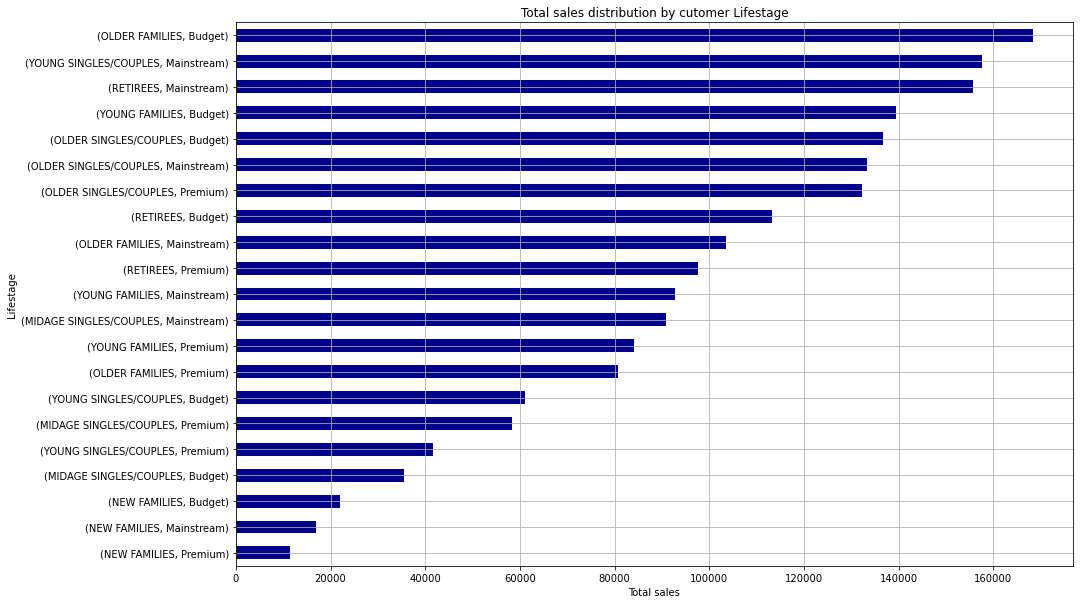

In [86]:
# To plot the customer types and thier sum of total sales,
customer_sales['sum'].sort_values().plot.barh(figsize=(15,10), color='darkblue')
plt.title("Total sales distribution by cutomer Lifestage")
plt.ylabel("Lifestage")
plt.xlabel("Total sales")
plt.grid()
plt.show()

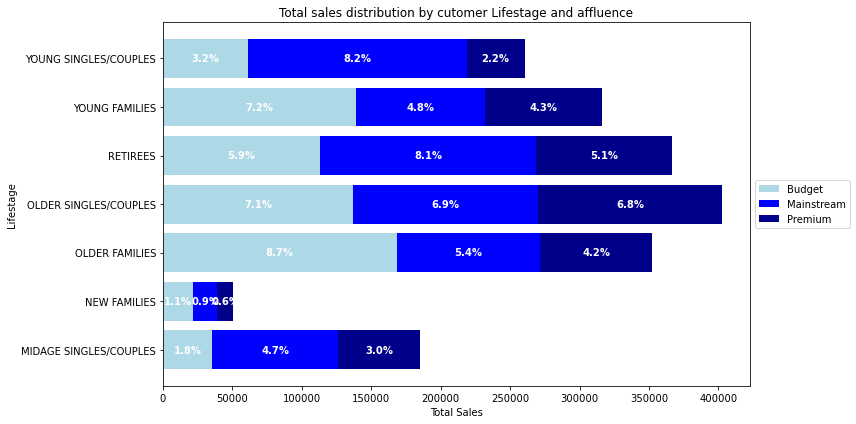

In [104]:
# Proportion of total sales for each PREMIUM_CUSTOMER type
total_sales = customer_sales["sum"].sum()
proportions = customer_sales["sum"] / total_sales
bars = customer_sales.unstack("PREMIUM_CUSTOMER")["sum"]

# Names and positions for bars
names = bars.index
r = np.arange(len(names))

# Plotting the stacked bar chart
plt.figure(figsize=(12
                    ,6))

plt.barh(r, bars["Budget"], color="lightblue", label="Budget")
plt.barh(r, bars["Mainstream"], left=bars["Budget"], color="blue", label="Mainstream")
plt.barh(r, bars["Premium"], left=bars["Budget"] + bars["Mainstream"], color="darkblue", label="Premium")

# Adding percentage text labels
for i, name in enumerate(names):
    plt.text(bars["Budget"][i] / 2, i, f"{proportions.xs(name)['Budget']:.1%}", va="center", ha="center", color="white",fontweight='bold')
    plt.text(bars["Budget"][i] + bars["Mainstream"][i] / 2, i, f"{proportions.xs(name)['Mainstream']:.1%}", va="center", ha="center", color="white", fontweight='bold')
    plt.text(bars["Budget"][i] + bars["Mainstream"][i] + bars["Premium"][i] / 2, i, f"{proportions.xs(name)['Premium']:.1%}", va="center", ha="center", color="white", fontweight='bold')

# Customize plot
plt.yticks(r, names)
plt.ylabel("Lifestage")
plt.xlabel("Total Sales")
plt.title("Total sales distribution by cutomer Lifestage and affluence")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()

# Save and display
plt.savefig("lifestage_sales_simple.png", bbox_inches="tight")
plt.show()


In [65]:
# Check for nulls in the full dataset
merged_df.isnull().values.any()

False

##### ----- The top 3 constributer to the total sales is,

##### Older families (Budget)
##### Young Singles/Couples (Mainstream)
##### Retirees (Mainstream)

#### To see how many unique type of customers are there for each of these who buys chips and contributes for the higher total sales

In [66]:
unique_customers = merged_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().sort_values(ascending=True)
pd.DataFrame(unique_customers)

LYLTY_CARD_NBR
LIFESTAGE              PREMIUM_CUSTOMER                
NEW FAMILIES           Premium                      588
                       Mainstream                   849
                       Budget                      1112
MIDAGE SINGLES/COUPLES Budget                      1504
OLDER FAMILIES         Premium                     2273
MIDAGE SINGLES/COUPLES Premium                     2431
YOUNG FAMILIES         Premium                     2433
YOUNG SINGLES/COUPLES  Premium                     2574
YOUNG FAMILIES         Mainstream                  2728
OLDER FAMILIES         Mainstream                  2831
MIDAGE SINGLES/COUPLES Mainstream                  3340
YOUNG SINGLES/COUPLES  Budget                      3779
RETIREES               Premium                     3872
YOUNG FAMILIES         Budget                      4017
RETIREES               Budget                      4454
OLDER FAMILIES         Budget                      4675
OLDER SINGLES/COUPLES  Premium                     4750
                       Budget                      4929
                       Mainstream                  4930
RETIREES               Mainstream                  6479
YOUNG SINGLES/COUPLES  Mainstream                  8088

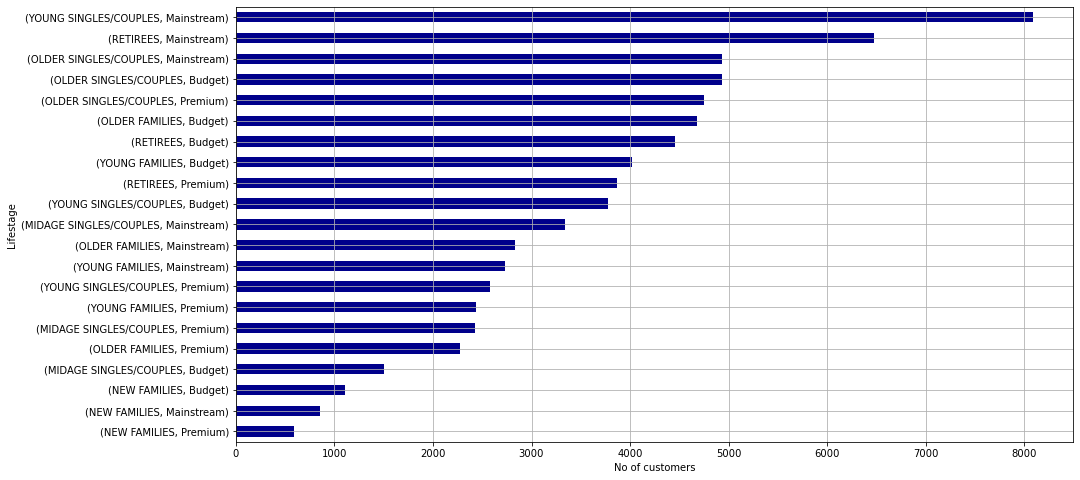

In [89]:
unique_customers.sort_values().plot.barh(figsize=(15,8), color='darkblue')
plt.xlabel("No of customers")
plt.ylabel("Lifestage")
plt.grid()
plt.show()

In [92]:
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,brand_names
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Co
1,2018-09-16,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,YOUNG SINGLES/COUPLES,Mainstream,RRD
2,2019-03-07,1,1003,3,52,Grain Waves Sour Cream&Chives g,1,3.6,YOUNG FAMILIES,Budget,Grain Waves
3,2019-03-08,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,YOUNG FAMILIES,Budget,Natural Chip Co
4,2018-11-02,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9,OLDER SINGLES/COUPLES,Mainstream,Woolworths


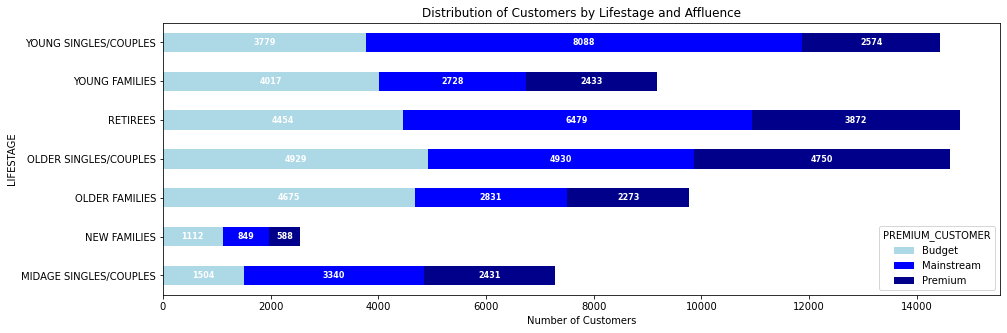

In [98]:
# Group and count unique LYLTY_CARD_NBR entries for each segment
sum_cust = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().unstack('PREMIUM_CUSTOMER').fillna(0)

# Plot the data
ax = sum_cust.plot(kind='barh', stacked=True, figsize=(15, 5), color=["lightblue", "blue", "darkblue"])

# Add labels to the bars with white text
for rect in ax.patches:
    if rect.get_width() > 0:
        ax.text(
            rect.get_x() + rect.get_width() / 2,
            rect.get_y() + rect.get_height() / 2,
            f'{rect.get_width():.0f}',
            ha='center', va='center', fontsize=8, color='white', fontweight='bold'
        )

# Set axis labels and title
ax.set_xlabel("Number of Customers")
ax.set_title("Distribution of Customers by Lifestage and Affluence")
plt.show()


#### There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This adds to more sales to these customer segments but this is not the case for the Budget - Older families segment.


#### Higher sales may be also be because of more chips being bright per customer 


In [69]:
merged_df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'LIFESTAGE', 'PREMIUM_CUSTOMER',
       'brand_names'],
      dtype='object')

#### Counting the number of occurrences of DATE for each unique combination of LYLTY_CARD_NBR (customer number), LIFESTAGE (lifestage group), and PREMIUM_CUSTOMER (premium customer flag).

In [70]:
frequency_by_customer = merged_df.groupby(['LYLTY_CARD_NBR','PREMIUM_CUSTOMER','LIFESTAGE']).count()['DATE']
freq = frequency_by_customer.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).agg(["mean", "count"]).sort_values(ascending=False, by="mean")
freq

,,mean,count
PREMIUM_CUSTOMER,LIFESTAGE,,
Mainstream,OLDER FAMILIES,5.031438,2831
Budget,OLDER FAMILIES,4.954011,4675
Premium,OLDER FAMILIES,4.923009,2273
Budget,YOUNG FAMILIES,4.760269,4017
Premium,YOUNG FAMILIES,4.752569,2433
Mainstream,YOUNG FAMILIES,4.731305,2728
Premium,OLDER SINGLES/COUPLES,3.737684,4750
Budget,OLDER SINGLES/COUPLES,3.734429,4929
Mainstream,OLDER SINGLES/COUPLES,3.715619,4930


#### The table gives the info about the frequency of purchase and average sales per customer

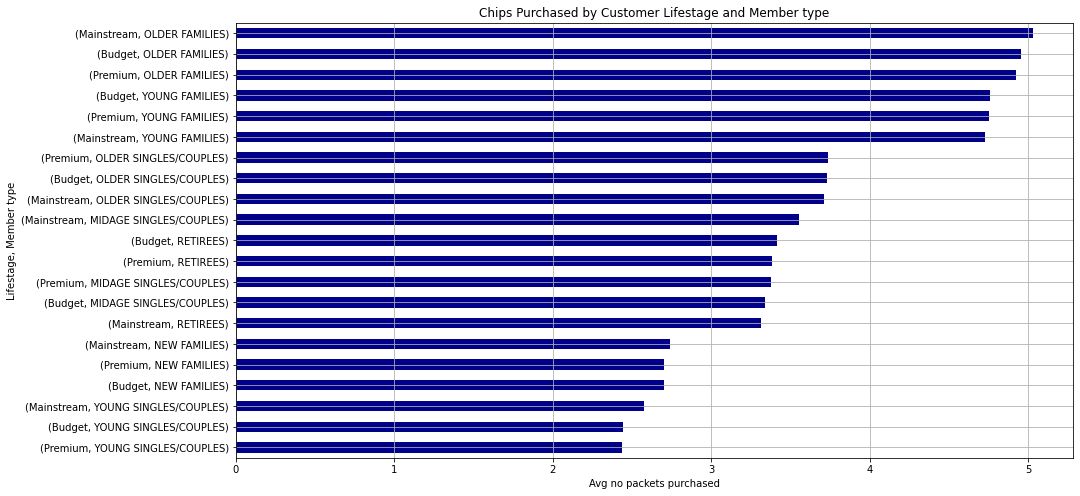

In [110]:
# Plotting the mean total sales per customer segment
freq['mean'].sort_values(ascending=True).plot.barh(figsize=(15,8), color='darkblue')
plt.ylabel("Lifestage, Member type")
plt.xlabel("Avg no packets purchased")
plt.title('Chips Purchased by Customer Lifestage and Member type')
plt.grid()
plt.show()

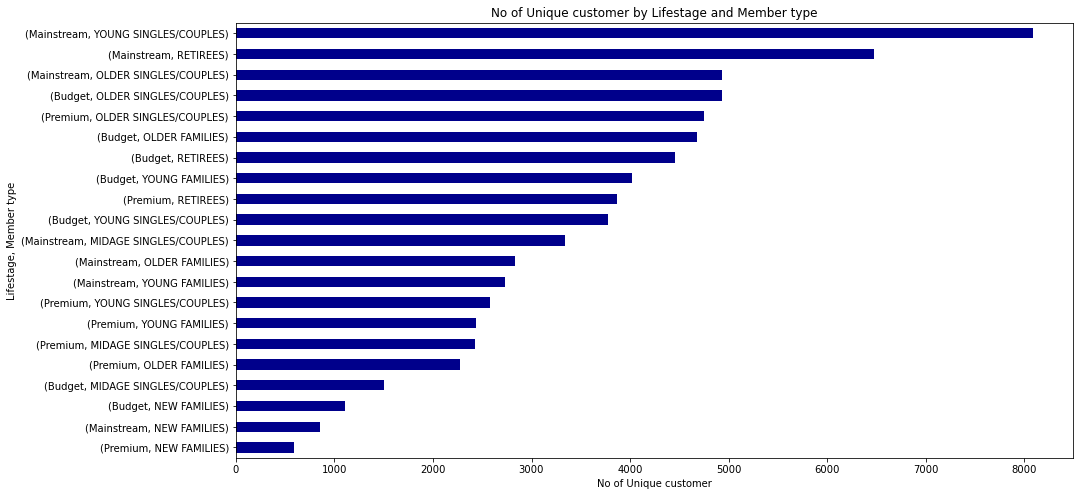

In [112]:
# Plotting the frequency of total sales per customer segment
freq['count'].sort_values(ascending=True).plot.barh(figsize=(15,8), color='darkblue')
plt.ylabel("Lifestage, Member type")
plt.xlabel("No of Unique customer")
plt.title('No of Unique customer by Lifestage and Member type')

plt.show()

#### The top 3 most frequent purchase is contributed by Older families.
#### Older families and young families in general buy more chips per customer
#### "Older - Budget" segment contributes to high sales mostly because of they have, High Frequency of Purchase and, Fairly high unique number of customer in the segment

#### Now, to get the  average price per unit chips bought for each customer segment (as this also contributes to the high total sales)

In [73]:
customer_sales.sort_values(ascending=False, by="mean")

sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
MIDAGE SINGLES/COUPLES Mainstream         90803.85  7.647284
YOUNG SINGLES/COUPLES  Mainstream        157621.60  7.558339
RETIREES               Premium            97646.05  7.456174
OLDER SINGLES/COUPLES  Premium           132263.15  7.449766
RETIREES               Budget            113147.80  7.443445
OLDER SINGLES/COUPLES  Budget            136769.80  7.430315
NEW FAMILIES           Mainstream         17013.90  7.317806
                       Budget             21928.45  7.297321
YOUNG FAMILIES         Budget            139345.85  7.287201
OLDER SINGLES/COUPLES  Mainstream        133393.80  7.282116
OLDER FAMILIES         Budget            168363.25  7.269570
YOUNG FAMILIES         Premium            84025.50  7.266756
OLDER FAMILIES         Mainstream        103445.55  7.262395
RETIREES               Mainstream        155677.05  7.252262
NEW FAMILIES           Premium            11491.10  7.231655
OLDER FAMILIES         Premium            80658.40  7.208079
YOUNG FAMILIES         Mainstream         92788.75  7.189025
MIDAGE SINGLES/COUPLES Premium            58432.65  7.112056
                       Budget             35514.80  7.074661
YOUNG SINGLES/COUPLES  Premium            41642.10  6.629852
                       Budget             61141.60  6.615624

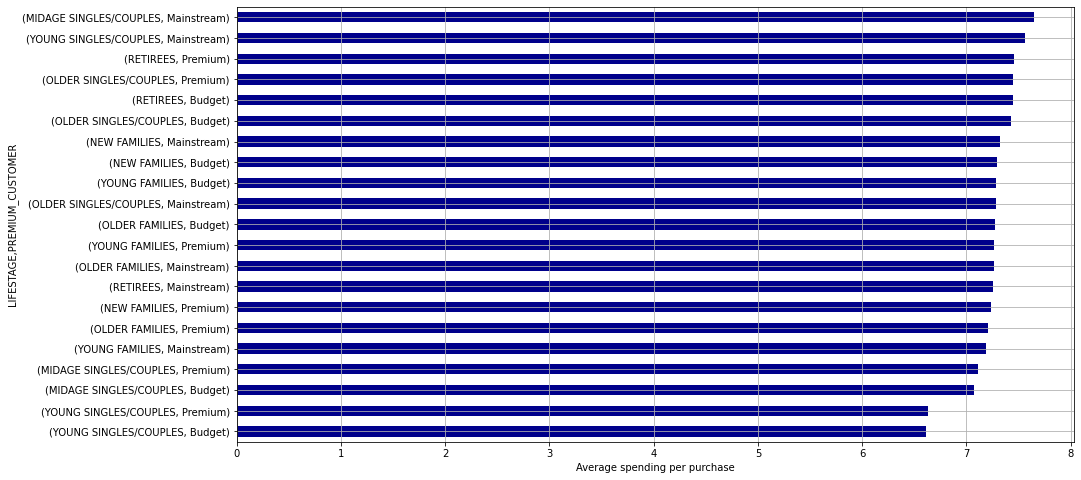

In [106]:
# Now, to plot this, 
customer_sales['mean'].sort_values(ascending=True).plot.barh(figsize=(15,8), color='darkblue')
plt.xlabel("Average spending per purchase")
plt.grid()
plt.show()

#### Highest average spending per purchase are contributed by the Midage and Young "Singles/Couples" mainstream.
#### Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. Thre is a slight difference in the pattern shown by this category's mainstream ans non-mainstream members. To check that out,

 #### Perform an independent t‐test between mainstream vs premium and budget midage and young singles and couples


In [75]:
from scipy.stats import ttest_ind

In [76]:
mainstream = merged_df["PREMIUM_CUSTOMER"] == "Mainstream"
# either "Budget" or "Premium"
budget_premium = (merged_df["PREMIUM_CUSTOMER"] == "Budget") | (merged_df["PREMIUM_CUSTOMER"] == "Premium") 
# either "MIDAGE SINGLES/COUPLES" or "YOUNG SINGLES/COUPLES".
mid_young_cust = (merged_df["LIFESTAGE"] == "MIDAGE SINGLES/COUPLES") | (merged_df["LIFESTAGE"] == "YOUNG SINGLES/COUPLES")
# Sales for young/mid-age Mainstream customers
a = merged_df[mid_young_cust & mainstream]['TOT_SALES']
# Sales for young/mid-age budget or premium customers
b = merged_df[mid_young_cust & budget_premium]['TOT_SALES']
# Perform t-test to compare the means of two independent samples to see if they are significantly different
stat, pval = ttest_ind(a.values, b.values, equal_var=False)
print(pval)
pval < 0.0000001


1.854204010753694e-281


True

#### If pval is very small (e.g., < 10^-7) it means the difference in TOT_SALES between the two groups is statistically significant.

## Deep dive into specific customer segments for insights

#### To check which brand of chips the top 3 segments contributing to Total Sales are buying.

In [77]:
merged_df["LIFESTAGE"].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [78]:
merged_df["PREMIUM_CUSTOMER"].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [79]:
merged_df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'LIFESTAGE', 'PREMIUM_CUSTOMER',
       'brand_names'],
      dtype='object')

YOUNG SINGLES/COUPLES ------ Premium
Kettle     838
Smiths     826
Doritos    570
Name: brand_names, dtype: int64


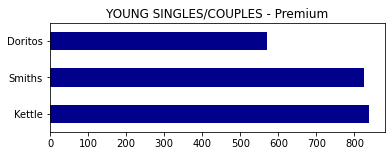

YOUNG SINGLES/COUPLES ------ Mainstream
Kettle      3844
Doritos     2541
Pringles    2315
Name: brand_names, dtype: int64


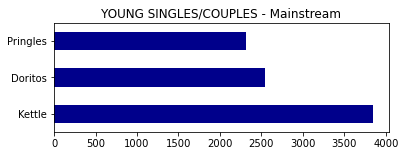

YOUNG SINGLES/COUPLES ------ Budget
Smiths     1245
Kettle     1211
Doritos     899
Name: brand_names, dtype: int64


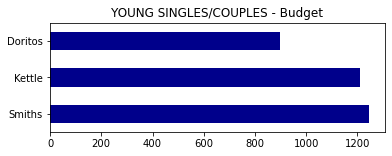

YOUNG FAMILIES ------ Premium
Kettle     1745
Smiths     1442
Doritos    1129
Name: brand_names, dtype: int64


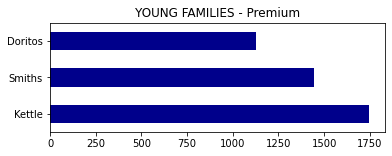

YOUNG FAMILIES ------ Mainstream
Kettle     1789
Smiths     1772
Doritos    1309
Name: brand_names, dtype: int64


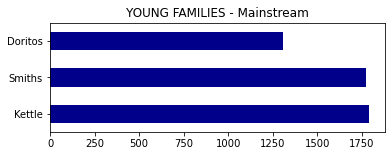

YOUNG FAMILIES ------ Budget
Kettle     2743
Smiths     2459
Doritos    1996
Name: brand_names, dtype: int64


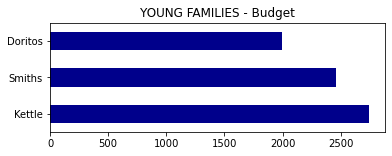

OLDER SINGLES/COUPLES ------ Premium
Kettle     2947
Smiths     2042
Doritos    1958
Name: brand_names, dtype: int64


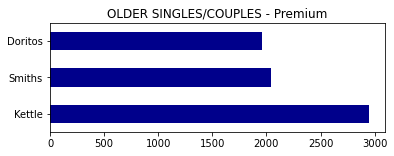

OLDER SINGLES/COUPLES ------ Mainstream
Kettle     2835
Smiths     2180
Doritos    2008
Name: brand_names, dtype: int64


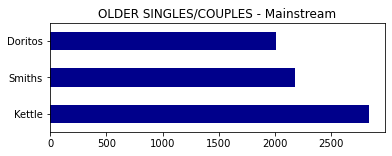

OLDER SINGLES/COUPLES ------ Budget
Kettle     3065
Smiths     2098
Doritos    1954
Name: brand_names, dtype: int64


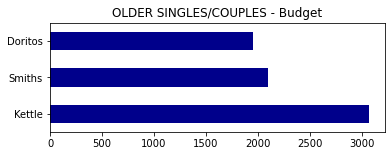

MIDAGE SINGLES/COUPLES ------ Premium
Kettle     1206
Smiths      986
Doritos     837
Name: brand_names, dtype: int64


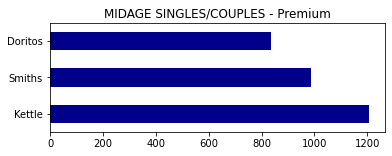

MIDAGE SINGLES/COUPLES ------ Mainstream
Kettle     2136
Smiths     1337
Doritos    1291
Name: brand_names, dtype: int64


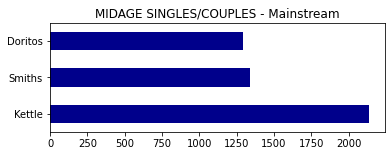

MIDAGE SINGLES/COUPLES ------ Budget
Kettle     713
Smiths     633
Doritos    533
Name: brand_names, dtype: int64


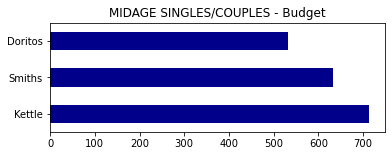

NEW FAMILIES ------ Premium
Kettle      247
Doritos     167
Pringles    165
Name: brand_names, dtype: int64


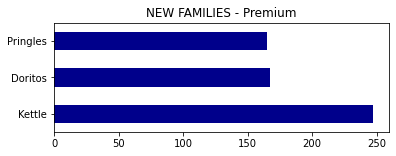

NEW FAMILIES ------ Mainstream
Kettle     414
Doritos    274
Smiths     254
Name: brand_names, dtype: int64


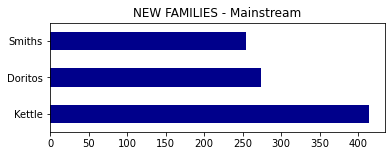

NEW FAMILIES ------ Budget
Kettle     510
Doritos    343
Smiths     341
Name: brand_names, dtype: int64


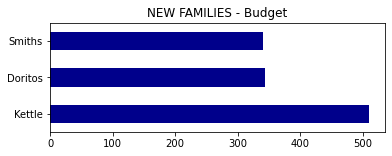

OLDER FAMILIES ------ Premium
Smiths     1515
Kettle     1512
Doritos    1065
Name: brand_names, dtype: int64


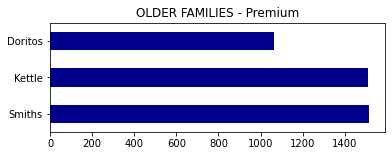

OLDER FAMILIES ------ Mainstream
Kettle     2019
Smiths     1835
Doritos    1449
Name: brand_names, dtype: int64


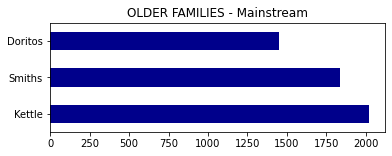

OLDER FAMILIES ------ Budget
Kettle     3320
Smiths     3093
Doritos    2351
Name: brand_names, dtype: int64


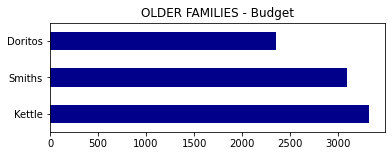

RETIREES ------ Premium
Kettle     2216
Smiths     1458
Doritos    1409
Name: brand_names, dtype: int64


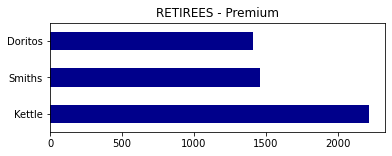

RETIREES ------ Mainstream
Kettle     3386
Smiths     2476
Doritos    2320
Name: brand_names, dtype: int64


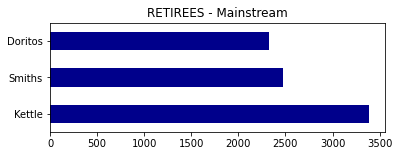

RETIREES ------ Budget
Kettle     2592
Doritos    1742
Smiths     1679
Name: brand_names, dtype: int64


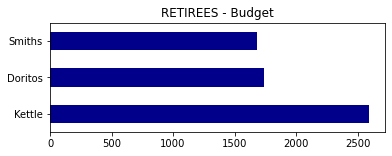

In [107]:
top1 = []
for i in merged_df["LIFESTAGE"].unique():
    for j in merged_df["PREMIUM_CUSTOMER"].unique():
        print(i,'------',j)
        
        top3 = merged_df[(merged_df["LIFESTAGE"] == i) 
                              & (merged_df["PREMIUM_CUSTOMER"] == j)]["brand_names"].value_counts().head(3)
        print(top3)
        top1.append(merged_df[(merged_df["LIFESTAGE"] == i) 
                              & (merged_df["PREMIUM_CUSTOMER"] == j)]["brand_names"].value_counts().head(1))
        plt.figure()
        top3.plot.barh(figsize=(6, 2), color='darkblue', title=f"{i} - {j}")
        plt.show()


#### Kettle seems to be the brand of choice for most segment 


#### Now, we check the packet size for each of the segment

In [81]:
merged_df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'LIFESTAGE', 'PREMIUM_CUSTOMER',
       'brand_names'],
      dtype='object')

In [82]:
# packet_size

In [83]:
merged_df_pack = pd.concat([merged_df,packet_size.rename('Packet_sizes')], axis=1)
merged_df_pack.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,brand_names,Packet_sizes
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Co,175.0
1,2018-09-16,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,YOUNG SINGLES/COUPLES,Mainstream,RRD,150.0
2,2019-03-07,1,1003,3,52,Grain Waves Sour Cream&Chives g,1,3.6,YOUNG FAMILIES,Budget,Grain Waves,NaN
3,2019-03-08,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,YOUNG FAMILIES,Budget,Natural Chip Co,175.0
4,2018-11-02,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9,OLDER SINGLES/COUPLES,Mainstream,Woolworths,160.0


YOUNG SINGLES/COUPLES ------ Premium
packet sizes 
 134.0     537
150.0     961
175.0    1587
Name: Packet_sizes, dtype: int64


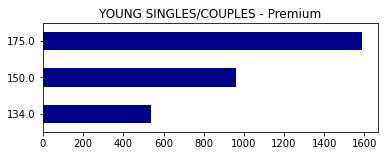

YOUNG SINGLES/COUPLES ------ Mainstream
packet sizes 
 134.0    2315
150.0    3159
175.0    4928
Name: Packet_sizes, dtype: int64


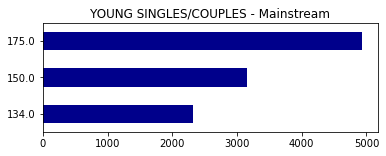

YOUNG SINGLES/COUPLES ------ Budget
packet sizes 
 134.0     832
150.0    1439
175.0    2262
Name: Packet_sizes, dtype: int64


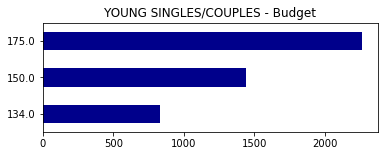

YOUNG FAMILIES ------ Premium
packet sizes 
 134.0    1007
150.0    1832
175.0    2926
Name: Packet_sizes, dtype: int64


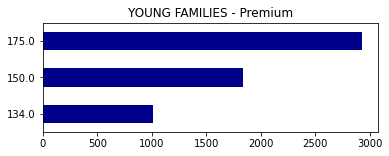

YOUNG FAMILIES ------ Mainstream
packet sizes 
 134.0    1148
150.0    2101
175.0    3087
Name: Packet_sizes, dtype: int64


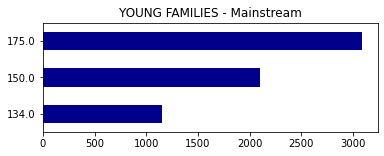

YOUNG FAMILIES ------ Budget
packet sizes 
 134.0    1674
150.0    2981
175.0    4800
Name: Packet_sizes, dtype: int64


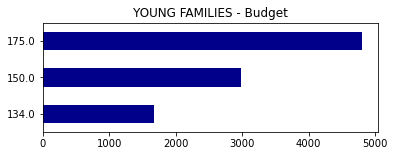

OLDER SINGLES/COUPLES ------ Premium
packet sizes 
 134.0    1744
150.0    2854
175.0    4382
Name: Packet_sizes, dtype: int64


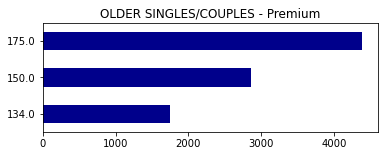

OLDER SINGLES/COUPLES ------ Mainstream
packet sizes 
 134.0    1720
150.0    2875
175.0    4422
Name: Packet_sizes, dtype: int64


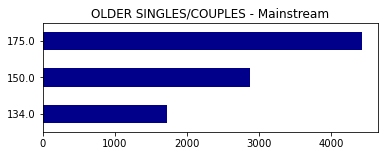

OLDER SINGLES/COUPLES ------ Budget
packet sizes 
 134.0    1843
150.0    2899
175.0    4535
Name: Packet_sizes, dtype: int64


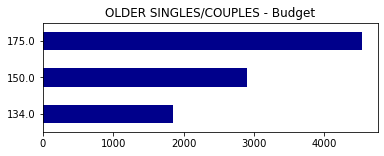

MIDAGE SINGLES/COUPLES ------ Premium
packet sizes 
 134.0     781
150.0    1285
175.0    2034
Name: Packet_sizes, dtype: int64


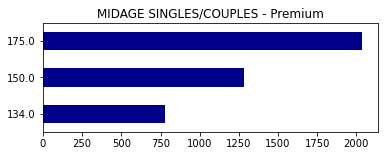

MIDAGE SINGLES/COUPLES ------ Mainstream
packet sizes 
 134.0    1159
150.0    1819
175.0    2912
Name: Packet_sizes, dtype: int64


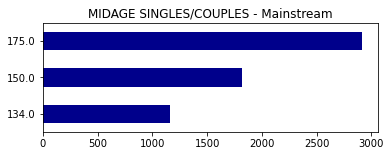

MIDAGE SINGLES/COUPLES ------ Budget
packet sizes 
 134.0     449
150.0     821
175.0    1256
Name: Packet_sizes, dtype: int64


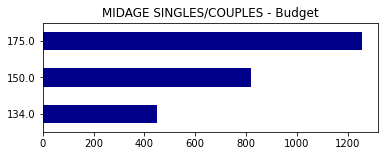

NEW FAMILIES ------ Premium
packet sizes 
 134.0    165
150.0    245
175.0    371
Name: Packet_sizes, dtype: int64


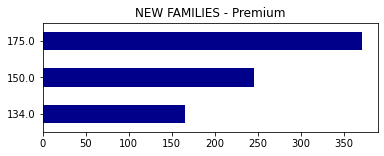

NEW FAMILIES ------ Mainstream
packet sizes 
 134.0    224
150.0    384
175.0    579
Name: Packet_sizes, dtype: int64


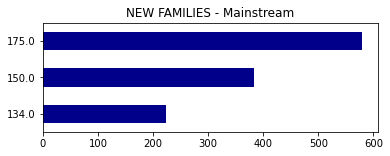

NEW FAMILIES ------ Budget
packet sizes 
 134.0    309
150.0    448
175.0    763
Name: Packet_sizes, dtype: int64


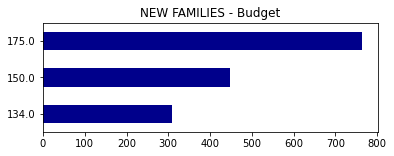

OLDER FAMILIES ------ Premium
packet sizes 
 134.0    1014
150.0    1750
175.0    2747
Name: Packet_sizes, dtype: int64


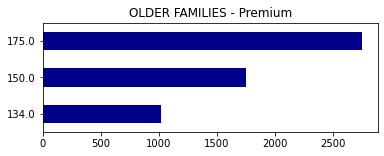

OLDER FAMILIES ------ Mainstream
packet sizes 
 134.0    1234
150.0    2261
175.0    3489
Name: Packet_sizes, dtype: int64


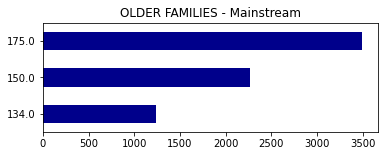

OLDER FAMILIES ------ Budget
packet sizes 
 134.0    1996
150.0    3708
175.0    5662
Name: Packet_sizes, dtype: int64


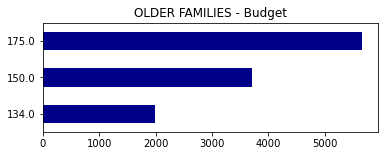

RETIREES ------ Premium
packet sizes 
 134.0    1331
150.0    2015
175.0    3232
Name: Packet_sizes, dtype: int64


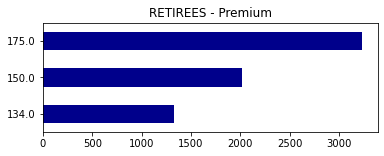

RETIREES ------ Mainstream
packet sizes 
 134.0    2103
150.0    3415
175.0    5187
Name: Packet_sizes, dtype: int64


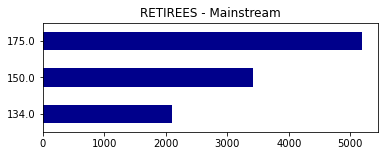

RETIREES ------ Budget
packet sizes 
 134.0    1517
150.0    2381
175.0    3768
Name: Packet_sizes, dtype: int64


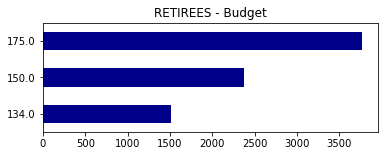

In [108]:
top_packs = []
for i in merged_df_pack["LIFESTAGE"].unique():
    for j in merged_df_pack["PREMIUM_CUSTOMER"].unique():
        print(i,'------',j)
        
        top3 = merged_df_pack[(merged_df_pack["LIFESTAGE"] == i) 
                              & (merged_df_pack["PREMIUM_CUSTOMER"] == j)]["Packet_sizes"].value_counts().head(3).sort_index()
        print("packet sizes",'\n', top3)
        top_packs.append(merged_df_pack[(merged_df_pack["LIFESTAGE"] == i) 
                              & (merged_df_pack["PREMIUM_CUSTOMER"] == j)]["Packet_sizes"].value_counts().head(1))
        plt.figure()
        top3.plot.barh(figsize=(6, 2), color='darkblue', title=f"{i} - {j}")
        plt.show()


#### Mostly bought packet sizes seems to be 175g


## Summary

The three highest contributing segments to the total sales are:
1. Older families - Budget
2. Young singles/couples - Mainstream
3. Retirees - Mainstream

Young Singles/Couples (Mainstream) has the highest population, followed by Retirees (Mainstream). Which explains their high total sales.
    
Despite Older Families not having the highest population, they have the highest frequency of purchase, which contributes to their high total sales.
    
Older Families followed by Young Families has the highest average quantity of chips bought per purchase.
    
The Mainstream category of the "Young and Midage Singles/Couples" have the highest spending of chips per purchase. And the difference to the non-Mainstream "Young and Midage Singles/Couples" are statistically significant.
    
Chips brand Kettle is dominating every segment as the most purchased brand.
       
Most frequent chip size purchased is 175gr followed by the 150gr chip size for all segments.